In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import json
import math

In [22]:
df = pd.read_csv('biden2021_polarity.csv')
df

,Author,Comment,PublishedAt,Likes,IsReply,Polarity_index,Polarity_index2
0,@monroekennedy-sb9cy,United States President Joe,2024-04-26 22:47:50+00:00,0,False,0.5,100.
1,@monroekennedy-sb9cy,Current Commander In Chief Leader of 310 milli...,2024-04-26 22:47:39+00:00,0,False,0.5,0.5
2,@RoseBtrfly,"He’s been reading other peoples words, and doe...",2024-03-12 07:22:09+00:00,0,False,-0.5,-0.7
3,@RoseBtrfly,"Take note at his right hand, the CCP, communis...",2024-03-12 07:21:29+00:00,0,False,-0.8,-0.7
4,@leossylee7286,Lessee trusted government our united declaimat...,2024-03-09 02:27:40+00:00,1,False,100,100
...,...,...,...,...,...,...,...
809,@frankiebowie6174,@@jowo8862 Tissue?,2021-01-20 18:54:14+00:00,0,True,100,100
810,@Raullives,@@jowo8862 OUR CONVERSATION JUST MADE THEM 10 ...,2021-01-20 19:52:49+00:00,0,True,100,100
811,@jowo8862,@@frankiebowie6174 Thanks LOL I'm not embaress...,2021-01-20 20:21:31+00:00,0,True,-0.5,-0.5
812,@jowo8862,@@Raullives well c-span isn't that bad so idrc...,2021-01-20 20:22:02+00:00,0,True,-0.8.,-0.5


In [23]:
# remove decimal after the number 
df['Polarity_index'] = df['Polarity_index'].str.rstrip('.')
df['Polarity_index2'] = df['Polarity_index2'].str.rstrip('.')

#extract numbers from string, including negative and decimals
def extract_numbers(input_string):
    numbers = input_string.str.extract(r'(-?\d+\.\d+|-?\d+)', expand=False)
    return numbers

df['Polarity_index'] = extract_numbers(df['Polarity_index'])
df['Polarity_index2'] = extract_numbers(df['Polarity_index2'])

#replace nan values with 100
df["Polarity_index"] = df['Polarity_index'].fillna(100)
df['Polarity_index2'] = df["Polarity_index2"].fillna(100)

#convert to float to calculate mean
df['Polarity_index'] = df['Polarity_index'].astype(float)
df['Polarity_index2'] = df['Polarity_index2'].astype(float)

#calculate average of two polarity indexes
df['final_polarity'] = df[['Polarity_index', 'Polarity_index2']].mean(axis=1)

#any average higher than 1 or lower than -1 converted to Nan
df.loc[(df['final_polarity'] > 1) | (df['final_polarity'] < -1), 'final_polarity'] = float('nan')


In [15]:
df["final_polarity"].describe()

count    768.000000
mean      -0.086328
std        0.631632
min       -1.000000
25%       -0.650000
50%       -0.500000
75%        0.550000
max        1.000000
Name: final_polarity, dtype: float64

In [24]:
#interaction index is the average distance between the original comment and the replies
interaction = []

#loop through df
for i in range(len(df)-1):
    #if the comment is the start of a conversation
    if df["IsReply"][i] == False:
        # if the next comment is a reply
        if df["IsReply"][i+1] == True and i < len(df) - 2:
            base_polarity = df["final_polarity"][i]
        j = i + 1
        conversation = []
        #loop through replies and calculate the difference in polarity from the original comment
        while j < len(df) and df["IsReply"][j] == True:
            delta = base_polarity - df["final_polarity"][j]
            conversation.append(abs(delta))
            j += 1
        #no division by zero
        avg = sum(conversation) / (len(conversation)+0.0001)
        interaction.append(avg)

print(interaction)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5498450154984502, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 1.149942502874856, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, 1.1166294456851438, 0.0, 0.8333055564814505, 0.04999500049995005, nan, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.04999500049994994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14998500149984992, 0.0, 1.6998300169983003, 0.1999800019998001, 0.0, 1.499850014998500

In [25]:
df["IsReply"].value_counts()

IsReply
True     466
False    348
Name: count, dtype: int64

In [26]:
#filter out the zeros and nan values
filtered_list = [x for x in interaction if x != 0 and not math.isnan(x)]
print((filtered_list))

[1.5498450154984502, 1.149942502874856, 1.1166294456851438, 0.8333055564814505, 0.04999500049995005, 0.04999500049994994, 0.14998500149984992, 1.6998300169983003, 0.1999800019998001, 1.4998500149985001, 0.49995000499950004, 1.483283890536982, 0.7999600019998999, 1.149942502874856, 0.14998500149985003, 0.09999500024998746, 0.8499150084991501, 0.49995000499950004, 0.0999900009999001, 1.24987501249875, 0.6999825004374892, 0.0999900009999001, 1.4998500149985001, 0.9999000099990001, 0.6499675016249187, 0.7999200079992002, 0.1062473438164046, 1.4998500149985001, 0.49995000499950004, 1.1499616679444018, 0.5333155561481284]


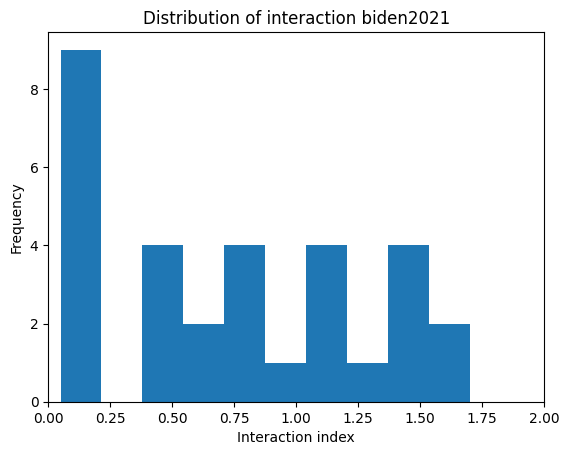

In [27]:
plt.hist(filtered_list)
plt.title("Distribution of interaction biden2021")
plt.xlabel("Interaction index")
plt.ylabel("Frequency")
plt.xlim(0,2)
plt.show()

In [9]:
info = {"obama2013": {}}

#mean polarity
mean = df["final_polarity"].mean()

#standard deviation of polarity
std = df["final_polarity"].std()

#percentage of extreme comments with polarity index greater than 0.75 or less than -0.75 
extreme_percent = ((df['final_polarity'] > 0.75) | (df['final_polarity'] < -0.75)).mean()

#percent of Nan values 
nan_percent = df['final_polarity'].isna().sum()/ len(df)

#interaction index
interaction_index = sum(filtered_list)/len(filtered_list)

info["obama2013"]['mean'] = mean
info["obama2013"]['std'] = std
info["obama2013"]['extreme_percent'] = extreme_percent
info["obama2013"]['nan_percent'] = nan_percent
info["obama2013"]['interaction_index'] = interaction_index
info


{'obama2013': {'mean': -0.35884615384615387,
  'std': 0.5026576006204805,
  'extreme_percent': 0.14130434782608695,
  'nan_percent': 0.29347826086956524,
  'interaction_index': 0.09999000099989999}}

In [10]:
with open('info.json', 'r') as file:
    existing_data = json.load(file)

# Add or update the dictionary
existing_data.update(info)

# Write the modified data back to the JSON file
with open('info.json', 'w') as file:
    json.dump(existing_data, file, indent=4)

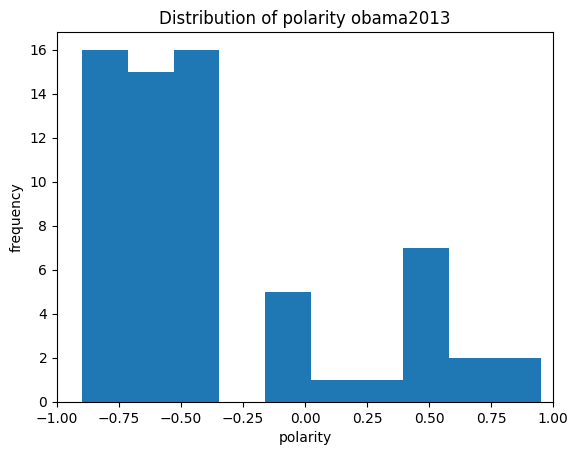

In [17]:
plt.hist(df["final_polarity"])
plt.title("Distribution of polarity obama2013")
plt.xlabel("polarity")
plt.ylabel("frequency")
plt.xlim(-1, 1)  
plt.show()

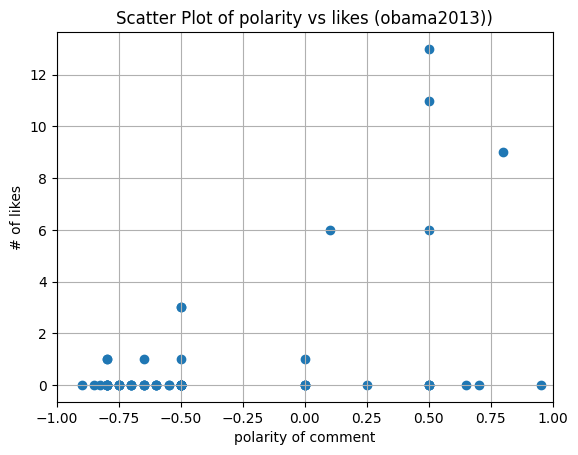

In [11]:
plt.scatter(df["final_polarity"], df["Likes"])
plt.xlabel('polarity of comment')
plt.ylabel('# of likes')
plt.title('Scatter Plot of polarity vs likes (obama2013))')
plt.grid(True)
plt.xlim(-1,1)
plt.show()

In [194]:
#standardize the likes
min_max_scaler = MinMaxScaler()
df.loc[:,'Likes_scaled'] = min_max_scaler.fit_transform(df[['Likes']])

#replace 0 with 0.01 to avoid zeros in later multiplication
df.loc[:,'Likes_scaled'] = df['Likes_scaled'].replace(0.000000, 0.01)

#multiply the likes and polarity score to get the in_group_index
df['in_group_index'] = df["Likes_scaled"] * df["final_polarity"]

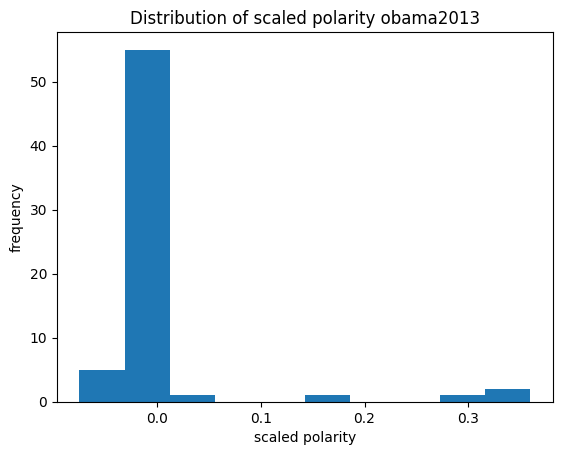

In [195]:
plt.hist(df["in_group_index"])
plt.title("Distribution of scaled polarity obama2013")
plt.xlabel("scaled polarity")
plt.ylabel("frequency")
plt.show()